### 目录
1. 导入包
2. 定义模型结构
3. 图像增强和batch以及训练模型
4. 进行测试

#### 导入包

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### 定义模型结构

In [2]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3), filters=32, kernel_size=3, padding='same', activation='relu', name='conv_1'))
model.add(MaxPool2D(strides=2, padding='valid', name='pool_1'))
model.add(Conv2D(64,3,padding='same', activation='relu', name='conv_2'))
model.add(Conv2D(64,3,padding='same', activation='relu', name='conv_3'))
model.add(MaxPool2D(strides=2, name='pool_2'))
model.add(Conv2D(128,3,padding='same', activation='relu', name='conv_4'))
model.add(Conv2D(128,3,padding='same', activation='relu', name='conv_5'))
model.add(MaxPool2D(strides=2, name='pool_3'))
model.add(Flatten(name='flatten'))
model.add(Dense(units=64, activation='relu', name='fc_1'))
model.add(Dense(units=2, activation='softmax', name='output_0'))

adam = Adam(1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# plot_model(model, to_file='cnn_simple_class.png', show_shapes=True, show_layer_names=True, rankdir='TB')
# plt.figure(figsize=(25,30))
# img = plt.imread('cnn_simple_class.png')
# plt.imshow(img)
# plt.axis('off')
# plt.show()

#### 图像增强和batch以及训练模型

In [8]:
train_datagen = ImageDataGenerator(rotation_range=40,       # 随机旋转度数
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   rescale=1/255,
                   shear_range=20,           # 随机错切变换
                   zoom_range=0.2,           # 随机放大
                   horizontal_flip=True,
                   fill_mode='nearest'       # 填充方式
                  ) 

test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 32
# 将训练数据和测试数据处理为batch
train_generator = train_datagen.flow_from_directory(directory='image/train', target_size=(150,150), batch_size=batch_size)
test_generator = test_datagen.flow_from_directory('image/test', target_size=(150,150), batch_size=batch_size)

print(train_generator.class_indices)

model.fit_generator(train_generator, steps_per_epoch=len(train_generator),    # 每一个周期迭代的次数
                    epochs=100,
                    validation_data=test_generator,
                    validation_steps=len(test_generator)
                   )

model.save('models/cnn_simple_class.h5')

Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
{'cat': 0, 'dog': 1}
Epoch 1/100
13/13 [==============================] - 5s 370ms/step - loss: 0.5640 - acc: 0.7023 - val_loss: 0.6596 - val_acc: 0.6550
Epoch 2/100
13/13 [==============================] - 5s 347ms/step - loss: 0.5601 - acc: 0.6944 - val_loss: 0.6463 - val_acc: 0.6200
Epoch 3/100
13/13 [==============================] - 5s 355ms/step - loss: 0.5730 - acc: 0.6877 - val_loss: 0.6578 - val_acc: 0.6300
Epoch 4/100
13/13 [==============================] - 5s 361ms/step - loss: 0.5609 - acc: 0.7372 - val_loss: 0.6358 - val_acc: 0.6150
Epoch 5/100
13/13 [==============================] - 5s 348ms/step - loss: 0.5399 - acc: 0.7240 - val_loss: 0.7438 - val_acc: 0.5650
Epoch 6/100
13/13 [==============================] - 5s 358ms/step - loss: 0.5503 - acc: 0.7283 - val_loss: 0.6667 - val_acc: 0.6450
Epoch 7/100
13/13 [==============================] - 5s 354ms/step - loss: 0.5278 - acc: 0.7481 - v

#### 进行测试

In [1]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


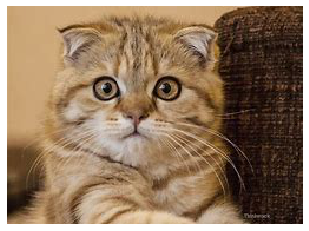

(1, 150, 150, 3)
预测结果为： ['cat']


In [2]:
label = np.array(['cat', 'dog'])
model = load_model('models/cnn_simple_class.h5')

# 加载图片
image = load_img('test_cat.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()
image = image.resize((150,150))
image = img_to_array(image)/255
image = np.expand_dims(image, 0)
print(image.shape)

print('预测结果为：', label[model.predict_classes(image)])